In [3]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('../index_Infomation_v0.1.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-11-01,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
1,2014-11-02,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
2,2014-11-03,4638.91015,2017.81005,17366.2402,1952.97,6.24,1.45,0.232372,3.843583,5.998912,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
3,2014-11-04,4623.64013,2012.09997,17383.8398,1935.19,6.15,1.43,0.232520,3.815476,5.955043,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
4,2014-11-05,4620.72021,2023.56994,17484.5292,1931.43,6.08,1.42,0.233553,3.824611,5.969301,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2024-06-26,17805.16010,5477.89990,39127.8007,2792.05,38.15,1.56,0.040891,33.713045,52.617977,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3526,2024-06-27,17858.67960,5482.87011,39164.0585,2784.06,38.29,1.57,0.041003,33.847424,52.827711,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3527,2024-06-28,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3528,2024-06-29,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"


In [5]:
# 삼성 주식 데이터 가져오기
df = stock_data[['Date', 'samsung_Close', '미국 중앙은행 기준금리', '미국 국내총생산(GDP) 전분기 대비', 'dollar_to_won_Close']]
df

,Date,samsung_Close,미국 중앙은행 기준금리,미국 국내총생산(GDP) 전분기 대비,dollar_to_won_Close
0,2014-11-01,24880.0,0.09,17912.079,1053.80004
1,2014-11-02,24880.0,0.09,17912.079,1053.80004
2,2014-11-03,24700.0,0.09,17912.079,1051.19995
3,2014-11-04,24340.0,0.09,17912.079,1081.59997
4,2014-11-05,24040.0,0.09,17912.079,1076.90002
...,...,...,...,...,...
3525,2024-06-26,81300.0,5.33,28629.153,1390.89001
3526,2024-06-27,81600.0,5.33,28629.153,1393.38000
3527,2024-06-28,81500.0,5.33,28629.153,1386.94995
3528,2024-06-29,81500.0,5.33,28629.153,1386.94995


In [6]:
df['US_GDP_KRW'] = round(df['미국 국내총생산(GDP) 전분기 대비'] * df['dollar_to_won_Close'])
df

C:\Users\4호실-8\AppData\Local\Temp\ipykernel_8180\2126781118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df['미국 국내총생산(GDP) 전분기 대비'] * df['dollar_to_won_Close'])


,Date,samsung_Close,미국 중앙은행 기준금리,미국 국내총생산(GDP) 전분기 대비,dollar_to_won_Close,US_GDP_KRW
0,2014-11-01,24880.0,0.09,17912.079,1053.80004,18875750.0
1,2014-11-02,24880.0,0.09,17912.079,1053.80004,18875750.0
2,2014-11-03,24700.0,0.09,17912.079,1051.19995,18829177.0
3,2014-11-04,24340.0,0.09,17912.079,1081.59997,19373704.0
4,2014-11-05,24040.0,0.09,17912.079,1076.90002,19289518.0
...,...,...,...,...,...,...
3525,2024-06-26,81300.0,5.33,28629.153,1390.89001,39820003.0
3526,2024-06-27,81600.0,5.33,28629.153,1393.38000,39891289.0
3527,2024-06-28,81500.0,5.33,28629.153,1386.94995,39707202.0
3528,2024-06-29,81500.0,5.33,28629.153,1386.94995,39707202.0


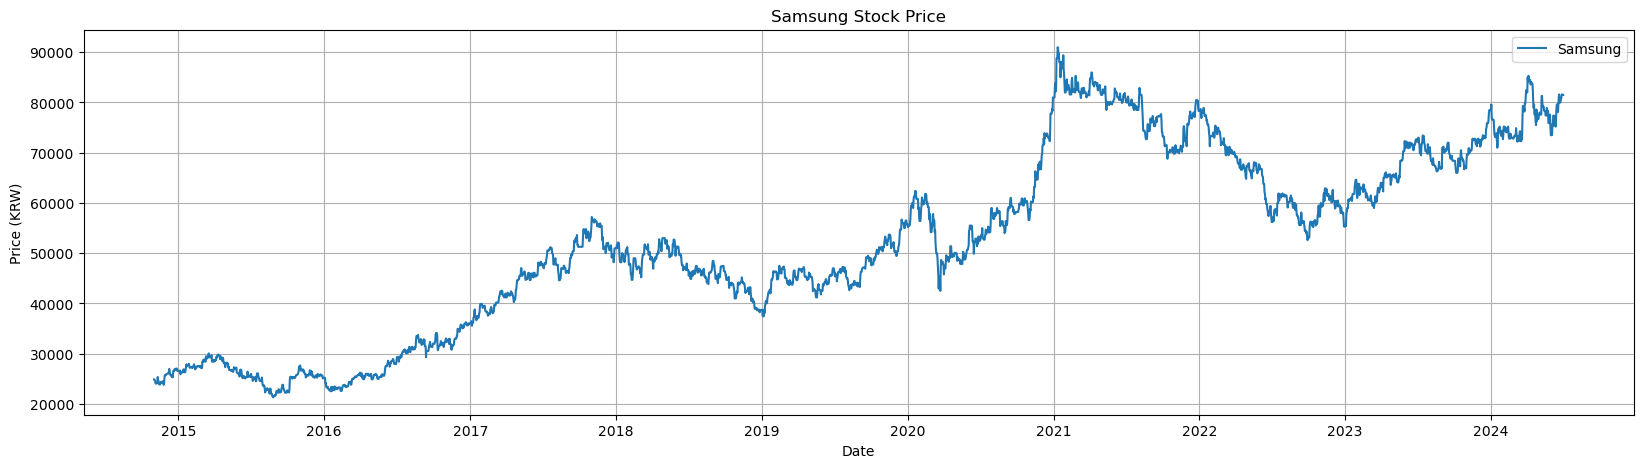

In [7]:
# 삼성 주식 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['samsung_Close'], label='Samsung')

plt.title('Samsung Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

plt.show()


In [8]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

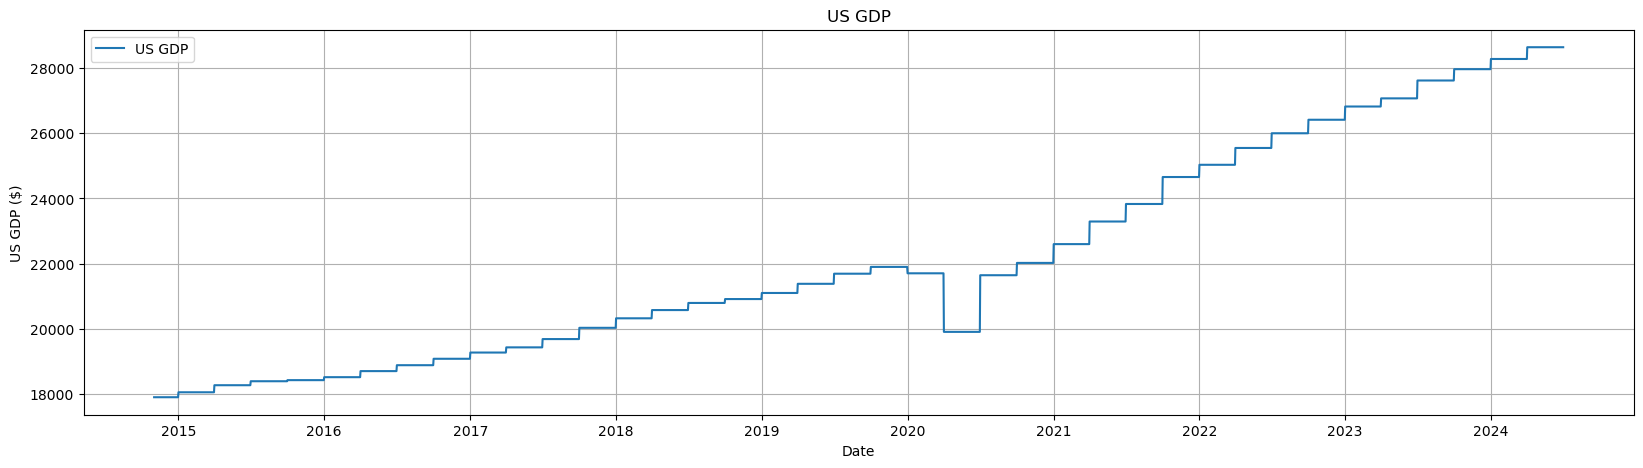

In [9]:
# 미 GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['미국 국내총생산(GDP) 전분기 대비'], label='US GDP')

plt.title('US GDP')
plt.xlabel('Date')
plt.ylabel('US GDP ($)')
plt.legend()
plt.grid(True)

plt.show()

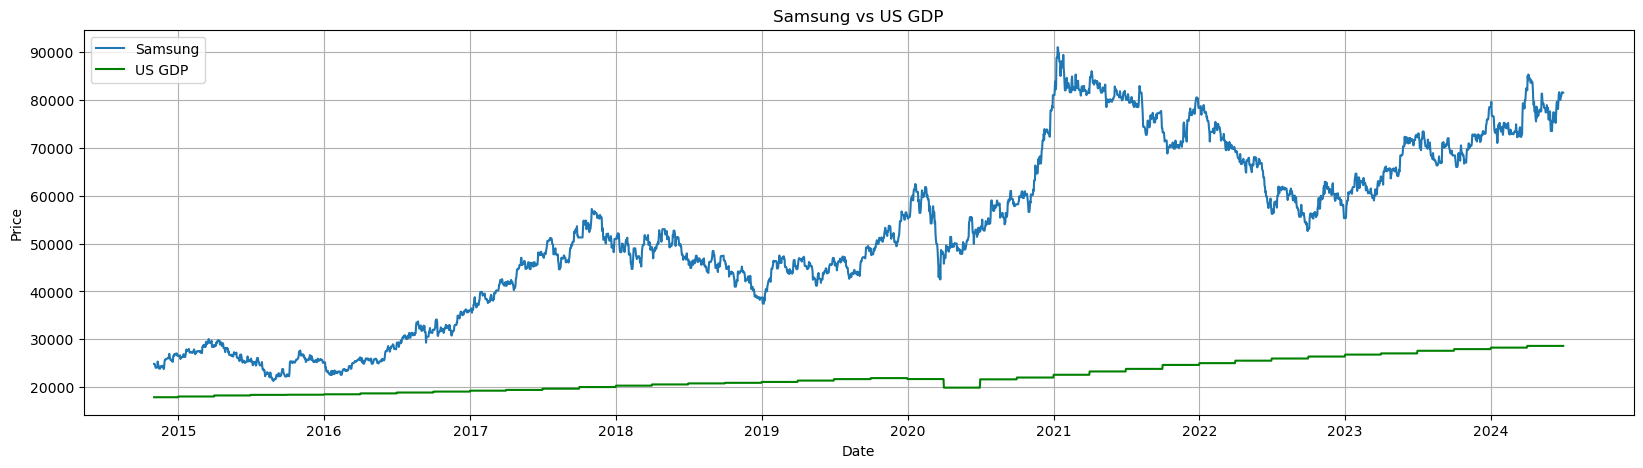

In [10]:
# 삼성 vs 미GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['samsung_Close'], label='Samsung')
plt.plot(df['Date'], df['미국 국내총생산(GDP) 전분기 대비'], label='US GDP', color='green')

plt.title('Samsung vs US GDP')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

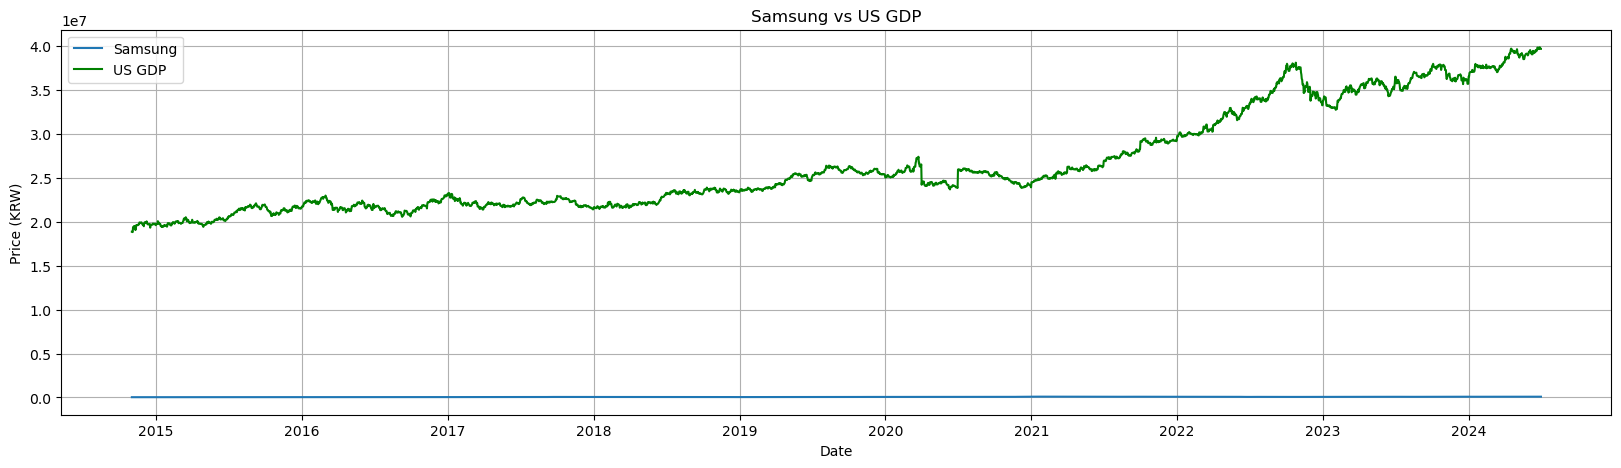

In [11]:
# 삼성 vs 미GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['samsung_Close'], label='Samsung')
plt.plot(df['Date'], df['US_GDP_KRW'], label='US GDP', color='green')

plt.title('Samsung vs US GDP')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

plt.show()

In [12]:
samsung_normal_df = normalize(df, 'samsung_Close')
USGDP_normalize = normalize(df, 'US_GDP_KRW')

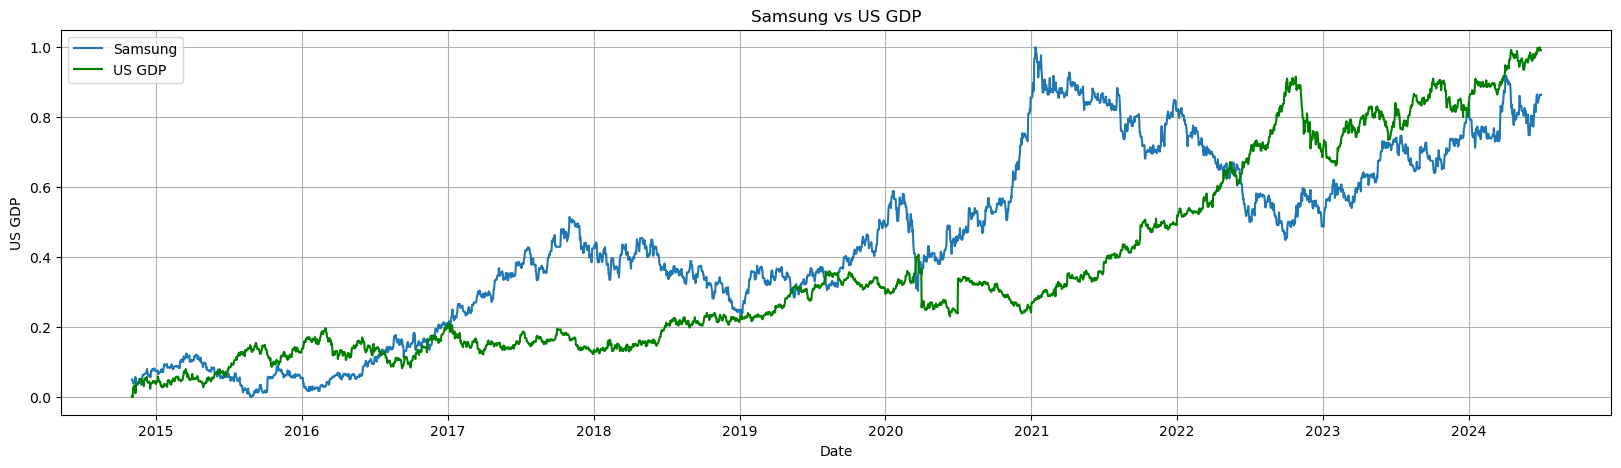

In [13]:
# 정규화 적용 삼성주식과 미GDP 그래프
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], samsung_normal_df, label='Samsung')
plt.plot(df['Date'], USGDP_normalize, label='US GDP', color='green')

plt.title('Samsung vs US GDP')
plt.xlabel('Date')
plt.ylabel('US GDP')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
# 변동율 차이 비교
daily_change_USGDP = df['US_GDP_KRW'].pct_change()

#그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], daily_change_samsung, label='Samsung')
plt.plot(df['Date'], daily_change_USGDP, label='US GDP', color='green')
plt.ylim(-0.05, 0.05)

plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

plt.show()

NameError: name 'daily_change_samsung' is not defined

<Figure size 2000x500 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


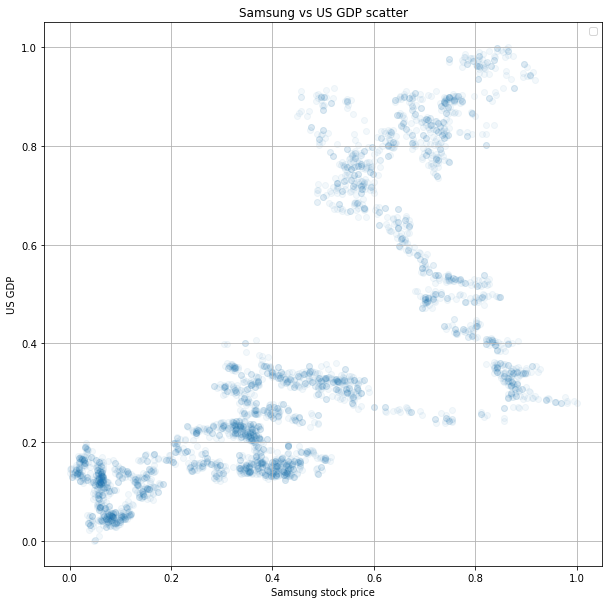

In [ ]:
# 정규화 데이터로 산점도 그래프
plt.figure(figsize=(10,10))
plt.scatter(samsung_normal_df, USGDP_normalize, alpha=0.05)

plt.title('Samsung vs US GDP scatter')
plt.xlabel('Samsung stock price')
plt.ylabel('US GDP')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Calculate the correlation
correlation = df['US_GDP_KRW'].corr(df['samsung_Close'])
print(f"Correlation between Gold Price and Apple Stock Price: {correlation:.2f}")

Correlation between Gold Price and Apple Stock Price: 0.71


In [15]:
compare1 = "samsung"  # samsung, apple
compare2 = "US GDP"
compare2data = "미국 국내총생산(GDP) 전분기 대비"

C:\Users\4호실-8\AppData\Local\Temp\ipykernel_8180\616472008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4715  , p=0.2252  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=1.4727  , p=0.2249  , df=1
likelihood ratio test: chi2=1.4724  , p=0.2250  , df=1
parameter F test:         F=1.4715  , p=0.2252  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8197  , p=0.4407  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=1.6417  , p=0.4401  , df=2
likelihood ratio test: chi2=1.6413  , p=0.4401  , df=2
parameter F test:         F=0.8197  , p=0.4407  , df_denom=3523, df_num=2
                                   OLS Regression Results                                  
Dep. Variable:     미국 국내총생산(GDP) 전분기 대비_Normalized   R-squared:                       0.667
Model:                                         OLS   Adj. R-squared:                  0.667
Method:                              Least Squares   F-statistic:                     7077.
Date:                   

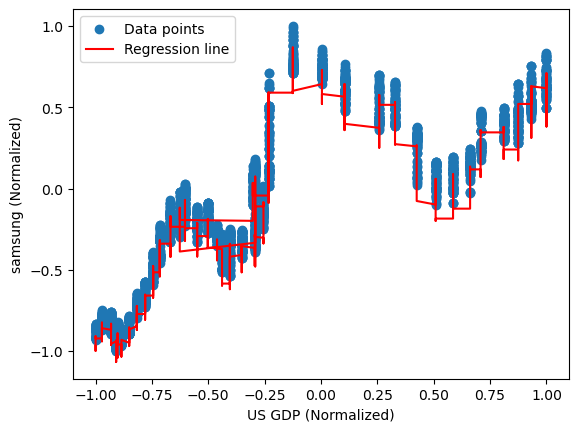

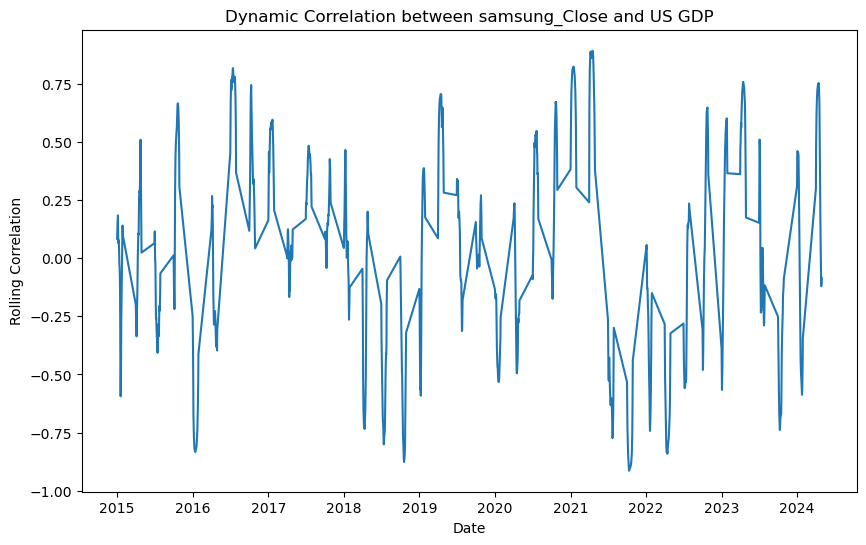

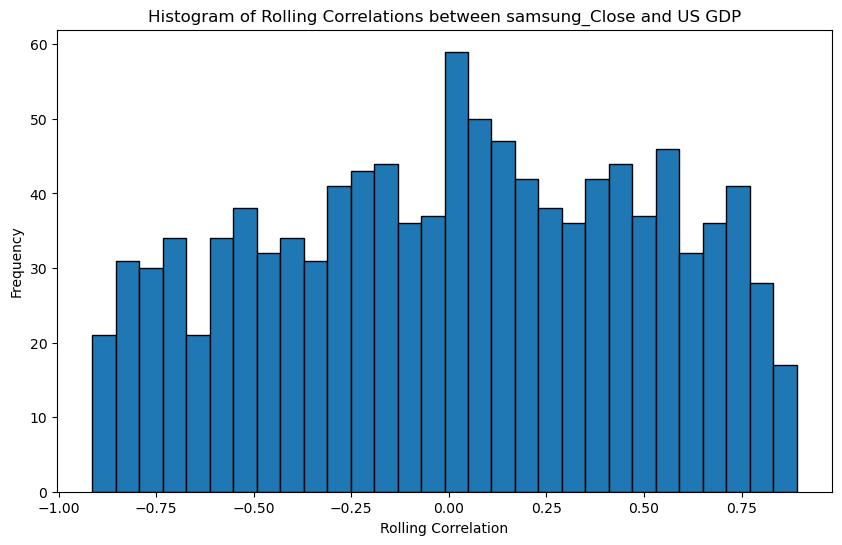


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4715  , p=0.2252  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=1.4727  , p=0.2249  , df=1
likelihood ratio test: chi2=1.4724  , p=0.2250  , df=1
parameter F test:         F=1.4715  , p=0.2252  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8197  , p=0.4407  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=1.6417  , p=0.4401  , df=2
likelihood ratio test: chi2=1.6413  , p=0.4401  , df=2
parameter F test:         F=0.8197  , p=0.4407  , df_denom=3523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5103  , p=0.6752  , df_denom=3520, df_num=3
ssr based chi2 test:   chi2=1.5340  , p=0.6744  , df=3
likelihood ratio test: chi2=1.5337  , p=0.6745  , df=3
parameter F test:         F=0.5103  , p=0.6752  , df_denom=3520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9316  , p=0.

c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [16]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests

# 필요한 데이터만 가져오기
df = stock_data[['Date', f'{compare1}_Close', f'{compare2data}', 'dollar_to_won_Close']]
df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
df.head(3)

def normalize_data(series):
    # MinMaxScaler를 사용하여 데이터를 -1과 1 사이로 정규화
    scaler = MinMaxScaler(feature_range=(-1, 1))
    return scaler.fit_transform(series.values.reshape(-1, 1))

def Regression(compare1, compare2data, compare2):
    # 데이터 정규화
    stock_data[f'{compare1}_Close_Normalized'] = normalize_data(stock_data[f'{compare1}_Close'])
    stock_data[f'{compare2data}_Normalized'] = normalize_data(stock_data[f'{compare2data}'])

    # 선형 회귀 분석
    X = stock_data[f'{compare1}_Close_Normalized']
    y = stock_data[f'{compare2data}_Normalized']
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # 회귀 분석 결과 출력
    print(model.summary())

    # 산점도 및 회귀선 그래프
    plt.scatter(stock_data[f'{compare2data}_Normalized'], stock_data[f'{compare1}_Close_Normalized'], label='Data points')
    plt.plot(stock_data[f'{compare2data}_Normalized'], predictions, color='red', label='Regression line')
    plt.xlabel(f'{compare2} (Normalized)')
    plt.ylabel(f'{compare1} (Normalized)')
    plt.legend()
    plt.show()

    
def rolling_correlation_and_granger_test(compare1, compare2data, compare2, window_size=30, max_lag=5, stock_data=stock_data):
    col1 = f'{compare1}_Close'
    col2 = compare2data

    # 날짜 인덱스 설정
    if not pd.api.types.is_datetime64_any_dtype(stock_data.index):
        stock_data.index = pd.to_datetime(stock_data['Date'])
        stock_data = stock_data.drop(columns=['Date'])

    # 롤링 상관관계 계산
    rolling_corr = stock_data[col1].rolling(window=window_size).corr(stock_data[col2]).dropna()

    # 무한 값과 NaN 값 제거
    rolling_corr = rolling_corr[~rolling_corr.isin([np.inf, -np.inf])].dropna()

    # 롤링 상관관계 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_corr)
    plt.xlabel('Date')
    plt.ylabel('Rolling Correlation')
    plt.title(f'Dynamic Correlation between {col1} and {compare2}')
    plt.show()

    # 롤링 상관관계의 히스토그램 그리기
    plt.figure(figsize=(10, 6))
    plt.hist(rolling_corr, bins=30, edgecolor='k')
    plt.xlabel('Rolling Correlation')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Rolling Correlations between {col1} and {compare2}')
    plt.show()

    # 그랜저 인과성 테스트
    granger_test_result = grangercausalitytests(stock_data[[col1, col2]], max_lag, verbose=True)

    return rolling_corr, granger_test_result

def Granger(compare1, compare2data, compare2, stock_data=stock_data):
    if f'{compare1}_Close' not in stock_data.columns or compare2data not in stock_data.columns:
        raise KeyError(f"Columns {compare1}_Close and/or {compare2data} not found in the provided DataFrame")
    
    max_lag = 2
    result1 = grangercausalitytests(stock_data[[f'{compare1}_Close', compare2data]], max_lag, verbose=True)
    result2 = coint_johansen(stock_data[[f'{compare1}_Close', compare2data]], det_order=-1, k_ar_diff=1)
    
    return result1, result2.lr1, result2.cvt

def everything(compare1, compare2data, compare2):
    Granger(compare1, compare2data, compare2)
    Regression(compare1, compare2data, compare2)
    rolling_correlation_and_granger_test(compare1, compare2data, compare2)
everything(compare1, compare2data, compare2)